In [34]:
import pandas as pd
import glob
import os
import re
import sklearn
import matplotlib.pyplot as plt


In [2]:
path = r'C:\Users\sofch\Python\PR1.20\PR1.20\data\data-train'

folders_path_list = []

for folder in os.listdir(path):
    folders_path_list.append(os.path.join(path, folder))


In [3]:
column_names = ['File_Name', 'Content']
df = pd.DataFrame(columns=column_names)

for folder_path in folders_path_list:
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r', encoding='latin-1') as file:
            content = file.read()
            df = pd.concat([df, pd.DataFrame({'File_Name': [file_name], 'Content': [content]})], ignore_index=True)

In [4]:
df.head(10)

,File_Name,Content
0,1.txt,Chat Conversation Start\n\nU1: Good girls are ...
1,11.txt,"\nChat Conversation Start\n\nU1: Hi, How are y..."
2,12.txt,\nChat Conversation Start\n\n\nU1: Hello How a...
3,13.txt,\n\n\n\nChat Conversation Start\n\nU1: I want...
4,14.txt,"\n\n\nChat Conversation Start\n\n \nU1: Hi, I ..."
5,15.txt,"\n\n\nChat Conversation Start\n\nU1: Hi, I che..."
6,16.txt,\n\n\n\nChat Conversation Start\n\n\nU1: hello...
7,2.txt,\n\n\nChat Conversation Start\n\n\nU1: hi how ...
8,21.txt,\n\n\nChat Conversation Start\n\nU1: hi how ar...
9,22.txt,\n\n\nChat Conversation Start\n\n\nU1: I want ...


In [5]:
p1 = "Chat Conversation Start"
p2 = "Chat Conversation End"

# Define a function to remove p1 and p2
def remove_start_end(text):
    # Remove p1 only the first time it appears
    text = re.sub(rf'^\s*{re.escape(p1)}\s*', '', text)

    # Remove p2 only the last time it appears
    text = re.sub(rf'\s*{re.escape(p2)}\s*$', '', text)

    return text

# Apply the function to the "Content" column
df['Content'] = df['Content'].apply(remove_start_end)

In [6]:
df.head(10)

,File_Name,Content
0,1.txt,U1: Good girls are in bed now haha omg I miss ...
1,11.txt,"U1: Hi, How are you?\n\nU2: Great Thanks! Kind..."
2,12.txt,U1: Hello How are you \n\n\nU2: Hello hello m...
3,13.txt,"U1: I want to ask you about your study, It ha..."
4,14.txt,"U1: Hi, I checked our courses and ask our frie..."
5,15.txt,"U1: Hi, I checked our program page we need to ..."
6,16.txt,U1: hello hello I am so excited to start my ne...
7,2.txt,"U1: hi how are you, long time we did not talk ..."
8,21.txt,"U1: hi how are you, just to update you we have..."
9,22.txt,U1: I want to book a flight to Dubai but Iâm...


In [7]:
#pd.set_option('display.max_colwidth', None)
#df

In [9]:
import re, nltk, spacy, string


from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
import pyLDAvis
#import pyLDAvis.sklearn

In [10]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
#REMOVE USELESS TEXT

In [12]:
def clean_text(text):
    text = text.lower() #Make text lowercase
    #text = re.sub(r'\[.*?\]', '', text) #remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub(r'\w*\d\w*', '', text) #remove words containing numbers
    return text



In [20]:
print(df.columns)

Index(['File_Name', 'Content'], dtype='object')


In [29]:
df['cleaned_text'] = df['Content'].apply(clean_text)

In [16]:
 nlp = spacy.load("en_core_web_sm")

In [ ]:
# LEMMATIZATION :

In [26]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    #print(doc)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [63]:
df["df_lemmatized"] = df['Content'].apply(lambda x: lemmatizer(x))

In [65]:
print(df[['File_Name', 'df_lemmatized']].head())

  File_Name                                      df_lemmatized
0     1.txt  u1 : good girl bed haha omg I miss lot lovely ...
1    11.txt  u1 : hi , how ? u2 : Great thank ! kind fine !...
2    12.txt  u1 : hello how u2 : hello hello good friend fi...
3    13.txt  u1 : I want ask study , it lot mathematic ? bu...
4    14.txt  u1 : hi , I check course ask friend see one ta...


In [ ]:
# TOKENIZATION

In [67]:
def tokenizer(text):
    wpt = nltk.WordPunctTokenizer()
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # tokenize document
    tokens = wpt.tokenize(text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text


df["df_tokenized"] = df['Content'].apply(lambda x: tokenizer(x))
df['lemm + tok'] = df['df_lemmatized'].apply(tokenizer)


In [68]:
df

,File_Name,Content,cleaned_text,question_lemmatize,df_lemmatized,lemm + tok,df_tokenized
0,1.txt,U1 : Good girls bed haha omg I miss lot lovely...,good girls are in bed now haha omg i miss a l...,u1 : good girl be in bed now haha omg I miss a...,u1 : good girl bed haha omg I miss lot lovely ...,u1 : good girl bed haha omg I miss lot lovely ...,U1 : Good girls bed haha omg I miss lot lovely...
1,11.txt,"U1 : Hi , How ? U2 : Great Thanks ! Kind fine ...",hi how are you\n\n great thanks kind of fine ...,"u1 : Hi , how be you ? \n\n u2 : Great thank !...","u1 : hi , how ? u2 : Great thank ! kind fine !...","u1 : hi , ? u2 : Great thank ! kind fine ! I t...","U1 : Hi , How ? U2 : Great Thanks ! Kind fine ..."
2,12.txt,U1 : Hello How U2 : Hello hello best friend fi...,hello how are you \n\n\n hello hello my best...,u1 : hello how be you \n\n\n u2 : hello hello...,u1 : hello how u2 : hello hello good friend fi...,u1 : hello u2 : hello hello good friend finall...,U1 : Hello How U2 : Hello hello best friend fi...
3,13.txt,"U1 : I want ask study , It lot mathematics ? B...",i want to ask you about your study it has a ...,"u1 : I want to ask you about your study , it...","u1 : I want ask study , it lot mathematic ? bu...","u1 : I want ask study , lot mathematic ? busin...","U1 : I want ask study , It lot mathematics ? B..."
4,14.txt,"U1 : Hi , I checked courses ask friends see on...",hi i checked our courses and ask our friends ...,"u1 : Hi , I check our course and ask our frien...","u1 : hi , I check course ask friend see one ta...","u1 : hi , I check course ask friend see one ta...","U1 : Hi , I checked courses ask friends see on..."
...,...,...,...,...,...,...,...
11331,84444.txt,From : psyrobtw @ ubvmsd . cc . buffalo . edu ...,from psyrobtwubvmsdccbuffaloedu robert weiss\n...,from : psyrobtw@ubvmsd.cc.buffalo.edu ( Robert...,from : psyrobtw @ ubvmsd . cc . buffalo . edu ...,: psyrobtw @ ubvmsd . cc . buffalo . edu ( Rob...,From : psyrobtw @ ubvmsd . cc . buffalo . edu ...
11332,84445.txt,From : sandvik @ newton . apple . com ( Kent S...,from sandviknewtonapplecom kent sandvik\nsubje...,from : sandvik@newton.apple.com ( Kent Sandvik...,from : sandvik @ newton . apple . com ( Kent S...,: sandvik @ newton . apple . com ( Kent Sandvi...,From : sandvik @ newton . apple . com ( Kent S...
11333,84446.txt,From : sandvik @ newton . apple . com ( Kent S...,from sandviknewtonapplecom kent sandvik\nsubje...,from : sandvik@newton.apple.com ( Kent Sandvik...,from : sandvik @ newton . apple . com ( Kent S...,: sandvik @ newton . apple . com ( Kent Sandvi...,From : sandvik @ newton . apple . com ( Kent S...
11334,84507.txt,From : cutter @ gloster . via . mind . org ( c...,from cutterglosterviamindorg cutter\nsubject r...,from : cutter@gloster.via.mind.org ( cutter ) ...,from : cutter @ gloster . via . mind . org ( c...,: cutter @ gloster . via . mind . org ( cutter...,From : cutter @ gloster . via . mind . org ( c...


In [ ]:
# TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemm + tok'])

In [70]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [71]:
tfidf_df

,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,çon,ère,ée,égligent,élangea,érale,ête,íålittin,ñaustin,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# VISUALIZATION

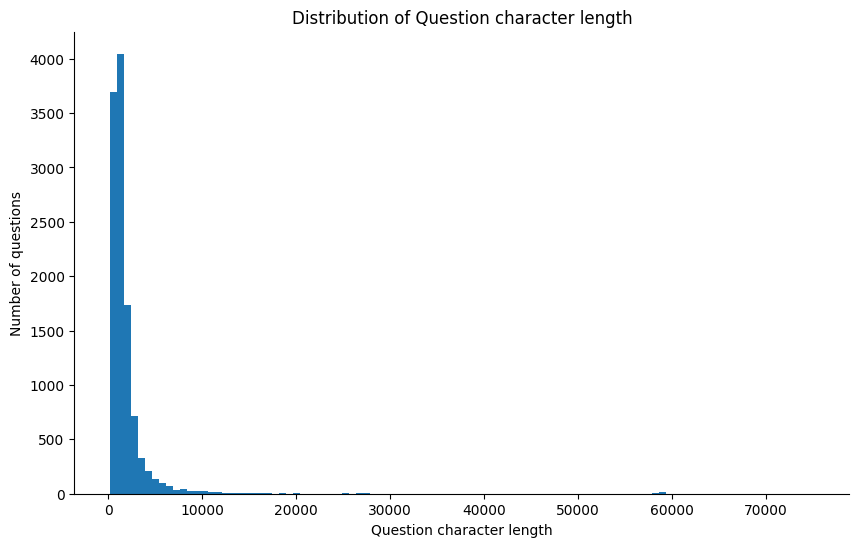

In [39]:
import seaborn as sns

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df['Content']]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Question character length')
plt.ylabel('Number of questions')
plt.xlabel('Question character length')
sns.despine()

In [40]:
from subprocess import check_output

C:\Users\sofch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



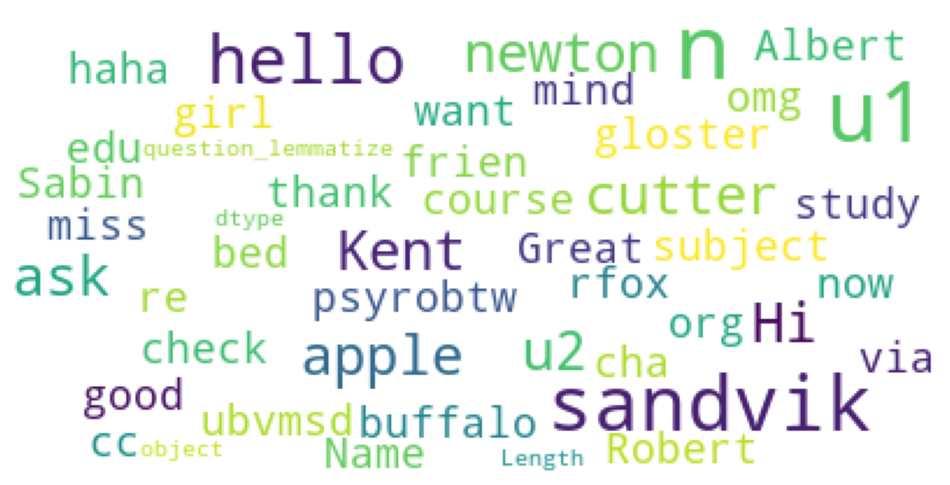

In [45]:
from wordcloud import WordCloud, STOPWORDS
import wordcloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(12.0,12.0)  
plt.rcParams['font.size']=12            
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['question_lemmatize']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()